<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/43_data_science_libs/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 3
Анализ и подготовка данных:

— Загрузите датасет California housing dataset.<br>
— Выполните базовый анализ данных: вывод размера выборки, проверка на<br> пропущенные значения, статистический анализ числовых переменных.<br>
— Визуализируйте распределения нескольких выбранных числовых переменных и <br> корреляции между ними.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

Получим данные

In [39]:
data = fetch_california_housing()

Проведем легкий EDA

In [40]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [41]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [42]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Соберем pandas dataset - для удобства

In [43]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [44]:
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [46]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Посмотрим на корреляцию между разными параметрами

<Axes: >

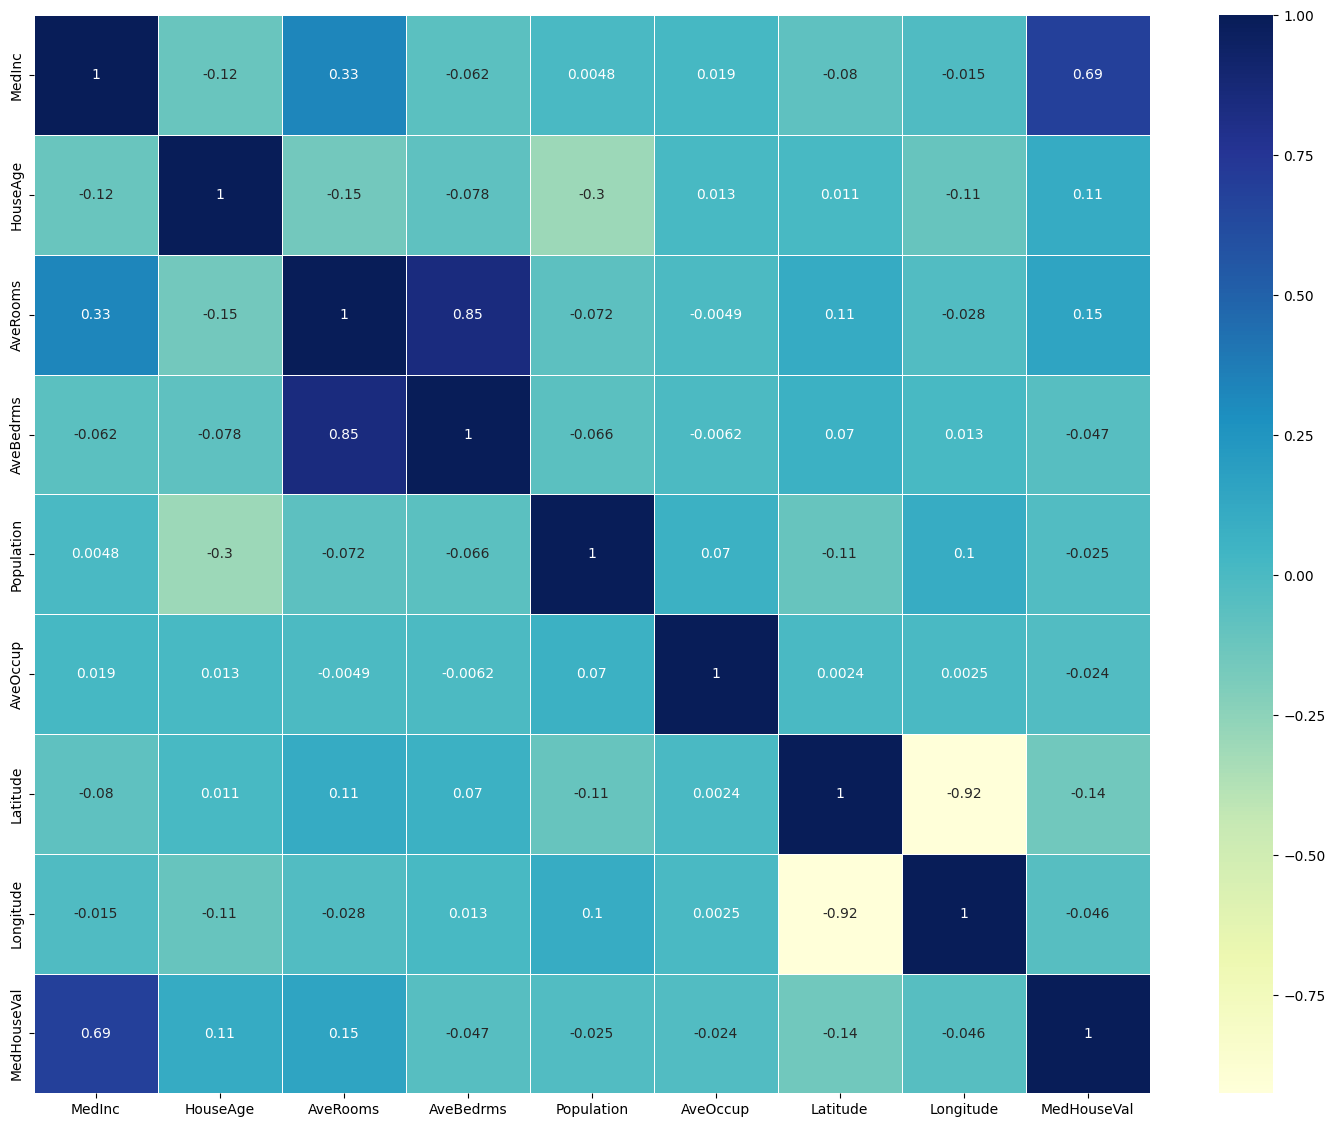

In [47]:
df_corr = df.corr(method='pearson', min_periods=1)
plt.figure(figsize=(18, 14))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            annot=True,
            linewidths=0.5,
            cmap="YlGnBu")

Легкая корреляция наблюдается между средним доходом в квартрале и целевым показателем (стоимость дома)

# Построение модели линейной регрессии:

— Разделите данные на обучающий и тестовый набор в соотношении 80/20. <br>
— Используйте только две переменные (по вашему выбору) для построения модели <br> линейной регрессии. Обоснуйте ваш выбор.<br>
— Постройте модель линейной регрессии, обучите ее на обучающем наборе и <br>сделайте предсказания на тестовом.<br>
— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).<br>
— Проведите эксперименты с различными признаками, попробуйте увеличить <br>количество признаков и сравните с базовыми метриками.<br>

Разделим датасет на тренировочный и тестовый. В качестве параметра возьмем MedInc, т.к. у него наилучшая корреляция

In [48]:
train, test = train_test_split(df[['MedHouseVal', 'MedInc']], test_size=0.2, random_state=42)

In [49]:
X_train = train.drop('MedHouseVal', axis=1)
y_train = train['MedHouseVal']
X_test = test.drop('MedHouseVal', axis=1)
y_test = test['MedHouseVal']

Создадим и натренируем модель

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Получим предсказанные значения на тестовом датасете

In [51]:
y_test_pred = model.predict(X_test)

Посмотрим на результаты

In [52]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2_score_val = r2_score(y_test, y_test_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('R2: ', r2_score_val)

MSE:  0.7091157771765549
MAE:  0.629908653009376
R2:  0.45885918903846656


Результат R2 = 0.46 можно интерпретировать как только 46% цены дома зависит от параметра MedInc, остальные 54% зависят от иных параметров

Построим график соответствия предсказаний реальным ценам

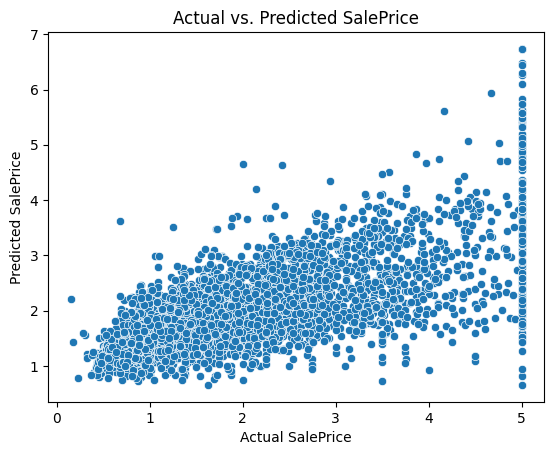

In [53]:
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

Чтобы найти комбинацию признаков, дающую наилучший R2 переберем их все и посчитаем R2 для каждой комбинации

In [54]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    return r2_score(y_test, y_test_pred)

In [55]:
def get_feature_combinations(features):
    for r in range(1, len(features) + 1):
        for combo in combinations(features, r):
            yield list(combo)

In [56]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
r2_max = -1
features_min = []
model_min = None
for features in get_feature_combinations(df.columns[:-1]):
    X_train = train[features]
    y_train = train['MedHouseVal']
    X_test = test[features]
    y_test = test['MedHouseVal']
    model = LinearRegression()
    r2 = evaluate_model(model, X_train, y_train, X_test, y_test)

    if r2 > r2_max:
        r2_max = r2
        features_max = features
        model_max = model
print('Best features:', features_max)
print('Best R2:', r2_max)

Best features: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Best R2: 0.5823239094526445


В результате рассчета R2 подскочило до 58%. Остальные 42% зависят от иных параметров

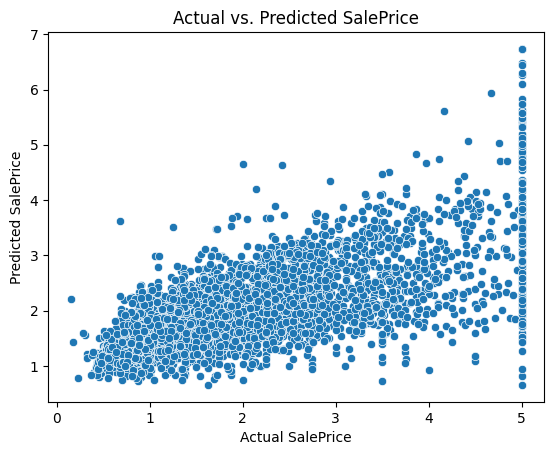

In [57]:
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()

# Вывод.
Линейная регрессия достаточно плохо подходит для решения поставленной задачи.<br> Не удается вывести достоверную линейную зависимость между имеющимися параметрами и целевым параметром.<br>
Следует применить другую модель.